# Requête HTTP 

Un requête HTTP est une requête basée sur le protocole TCP, elle fait partie de la couche application de la couche OSI. Elle permet d'accéder aux données mise à disposition sur une adresse IP (ou url résolue par un DNS) et un port. 

Les deux ports les plus utilisés dans le web sont le 80 pour les sites en HTTP et le 443 pour les sites en HTTPS. HTTPS est une variable du protocole HTTP basé sur le protocole TLS.

Il existe de nombreux types de requêtes selon la convention `REST`: 
- GET
- POST
- PUT 
- DELETE
- UPDATE.

Dans notre cas, nous allons utiliser la plupart du temps des GET et potentiellement des POST. 
- Le GET permet comme son nom l'indique de récupérer des informations en fonction de certains paramètres. 
- Le POST nécessite un envoi de données pour récupérer des données. Le body du post est, la plupart du temps, envoyé sous la forme d'un objet JSON.

Ces requêtes encapsulent un certain nombre de paramètres qui permettent soient d'identifier une provenance et un utilisateur ou de réaliser différentes actions.

In [25]:
import requests

In [26]:
url = "https://www.esiee.fr/"
response = requests.get(url)
response.status_code

200

Il existe deux méthodes pour récupérer le contenu de la page :

- `response.text` qui permet de retourner le texte sous la forme d'une chaine de charactères.
- `response.content` qui permet de récupérer le contenu de la page sous la forme de bytes

In [27]:
type(response.content)

bytes

In [28]:
type(response.text)

str

Pour récupérer les 1000 premiers charactères de la page :

In [29]:
response.text[0:1000]

'<!DOCTYPE html>\n<html lang="fr-FR">\n<head>\n\n<meta charset="utf-8">\n<!-- \n\tThis website is powered by TYPO3 - inspiring people to share!\n\tTYPO3 is a free open source Content Management Framework initially created by Kasper Skaarhoj and licensed under GNU/GPL.\n\tTYPO3 is copyright 1998-2024 of Kasper Skaarhoj. Extensions are copyright of their respective owners.\n\tInformation and contribution at https://typo3.org/\n-->\n\n\n\n<title>ESIEE Paris, l&#039;école de l&#039;innovation technologique | ESIEE Paris</title>\n<meta name="generator" content="TYPO3 CMS" />\n<meta name="description" content="Rejoignez ESIEE Paris, grande école d&#039;ingénieur dans les domaines des transitions numérique, énergétique et environnementale. Classée dans le groupe A, parmi les meilleures écoles d&#039;ingénieur selon le classement de l&#039;Etudiant. Habilitée par la Commission des Titres d&#039;Ingénieur (CTI). Membre de la Conférence des Grandes Ecoles (CGE). " />\n<meta name="viewport" conte

Pour récupérer les headers HTTP de la réponse :

In [30]:
response.headers

{'Date': 'Tue, 12 Nov 2024 14:30:48 GMT', 'Server': 'Apache', 'Content-Language': 'fr', 'Vary': 'Accept-Encoding', 'Content-Encoding': 'gzip', 'X-UA-Compatible': 'IE=edge', 'X-Content-Type-Options': 'nosniff', 'Content-Length': '16454', 'Content-Type': 'text/html; charset=utf-8', 'X-Varnish': '79267657 76550214', 'Age': '37', 'Via': '1.1 varnish (Varnish/7.1)', 'Accept-Ranges': 'bytes', 'Connection': 'keep-alive'}

On peut modifier les paramètres de la requête et/ou ses headers. On peut par exemple ajouter un UserAgent (identifiant de l'initiateur de la requête) et un timeout de 10 secondes :

In [31]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers=headers, timeout = 10)
response.content[0:1000]

b'<!DOCTYPE html>\n<html lang="fr-FR">\n<head>\n\n<meta charset="utf-8">\n<!-- \n\tThis website is powered by TYPO3 - inspiring people to share!\n\tTYPO3 is a free open source Content Management Framework initially created by Kasper Skaarhoj and licensed under GNU/GPL.\n\tTYPO3 is copyright 1998-2024 of Kasper Skaarhoj. Extensions are copyright of their respective owners.\n\tInformation and contribution at https://typo3.org/\n-->\n\n\n\n<title>ESIEE Paris, l&#039;\xc3\xa9cole de l&#039;innovation technologique | ESIEE Paris</title>\n<meta name="generator" content="TYPO3 CMS" />\n<meta name="description" content="Rejoignez ESIEE Paris, grande \xc3\xa9cole d&#039;ing\xc3\xa9nieur dans les domaines des transitions num\xc3\xa9rique, \xc3\xa9nerg\xc3\xa9tique et environnementale. Class\xc3\xa9e dans le groupe A, parmi les meilleures \xc3\xa9coles d&#039;ing\xc3\xa9nieur selon le classement de l&#039;Etudiant. Habilit\xc3\xa9e par la Commission des Titres d&#039;Ing\xc3\xa9nieur (CTI). Membr

## Exercice

## Exercice 1

- Créer une classe Python permettant de faire des requêtes HTTP.
- Cette classe doit utiliser toujours le même UserAgent.
- Le TimeOut sera spécifié à chaque appelle avec une valeur par défaut.
- Un mécanisme de retry sera mis en place de façon recursive.

## Exercice 2

- Faire une fonction permettant de supprimer tous les espaces supperflus d'une string
- Faire une fonction qui prend une string html et renvois une string intelligible (enlever les caractères spéciaux,
- Récupérer le domaine en fonction d'un url

In [32]:
import requests
from requests.exceptions import RequestException
import re
from urllib.parse import urlparse


class HttpRequester:
    def __init__(self, user_agent: str):
        self.user_agent = user_agent
        self.headers = {'User-Agent': self.user_agent}

    def make_request(self, url: str, timeout: int = 10, retries: int = 3):
        try:
            response = requests.get(url, headers=self.headers, timeout=timeout)
            response.raise_for_status()
            return response.text
        except RequestException as e:
            if retries > 0:
                return self.make_request(url, timeout, retries - 1)
            else:
                raise e
            


def remove_superfluous_spaces(text: str) -> str:
    return ' '.join(text.split())

def clean_html_string(html: str) -> str:
    clean_text = re.sub(r'<[^>]+>', '', html)  # Remove HTML tags
    clean_text = re.sub(r'&[^;]+;', '', clean_text)  # Remove HTML entities
    return clean_text

def extract_domain(url: str) -> str:
    parsed_url = urlparse(url)
    return parsed_url.netloc

# Exploitation du HTML  

Ici, il faut récupérer le code HTML d'un site web à partir d'une requête. Lorsque vous avez récupéré le texte d'un site il faut le parser. Pour cela, on utilise BeautifulSoup qui permet de transformer la structure HTML en objet Python. Cela permet de récupérer efficacement les données qui nous intéresse.

Pour les webmasters, le blocage le plus souvent mis en place et un blocage sur le User-Agent. Le User-Agent est un paramètre intégré dans la requête HTTP réalisé par le Navigateur pour envoyer au front des informations basiques :

- la version du Navigateur,
- la version de l'OS
- Le type de gestionnaire graphique (Gecko)
- le type de device utilisé

Exemple de User Agent :  

`Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:47.0) Gecko/20100101 Firefox/47.0`

Commençons à utiliser `BeautifulSoup`, il est normalement déjà installé, le cas échéant executez les lignes suivantes : 

In [33]:
import requests
from bs4 import BeautifulSoup

Pour transformer une requête (requests) en objet BeautifulSoup :

In [34]:
response = requests.get(url)
soup = BeautifulSoup(response.text)

Pour trouver tous les liens d'une page, on récupère la balise `a` qui permet de gérer les liens en HTML :

In [35]:
soup.find_all("a")[0:10]

[<a href="/#content">Aller au contenu</a>,
 <a href="/#menu">Aller au menu</a>,
 <a href="/plan-du-site/">Plan du site</a>,
 <a href="/actualites/journees-portes-ouvertes-2024-2025" target="_blank" title="Ouvre une nouvelle fenêtre">Bien choisir son école, c'est aussi la rencontrer ! Rendez-vous à ESIEE Paris le 7 décembre de 13h à 18h pour notre journée portes ouvertes.</a>,
 <a href="/"><img alt="ESIEE PARIS" class="a42-ac-replace-img" src="/typo3conf/ext/esiee_sitepackage/Resources/Public/imgs/svg/logo-esiee.svg"/></a>,
 <a href="/brochures-1">Brochures</a>,
 <a href="/informations/etudiantes-et-etudiants">Espace élèves</a>,
 <a href="/" hreflang="fr-FR" title="Français">
 <span>Fr</span>
 </a>,
 <a href="/en/" hreflang="en-US" title="English">
 <span>En</span>
 </a>,
 <a href="/candidater-1">Candidater</a>]

On peut aussi préciser la classe HTML qu'on veut récupérer :

```python
soup.find_all(class_="<CLASS_NAME>")[0:10]
```

Ici par exemple: 

In [36]:
soup.find_all(class_="toggler")[0:5]

[<button aria-controls="searchbox-header-form" aria-expanded="false" class="toggler">
 <i class="fa-solid fa-magnifying-glass"></i>
 <i class="fa-solid fa-xmark"></i>
 <span class="sr-only">
 <span class="display">Afficher</span><span class="hide">Masquer</span> la recherche
 		</span>
 </button>,
 <button aria-controls="submenu-40" aria-expanded="false" class="toggler"><span class="sr-only"><span class="display">Afficher</span><span class="hide">Masquer</span> le sous menu : </span>L'école</button>,
 <button aria-controls="submenu-563" aria-expanded="false" class="toggler"><span class="sr-only"><span class="display">Afficher</span><span class="hide">Masquer</span> le sous menu : </span>Gouvernance et conseils</button>,
 <button aria-controls="submenu-65" aria-expanded="false" class="toggler"><span class="sr-only"><span class="display">Afficher</span><span class="hide">Masquer</span> le sous menu : </span>Départements d'enseignements et de recherche</button>,
 <button aria-controls="su

Pour récupérer le text sans les balises HTML :

In [37]:
soup.text[0:1000]

"\n\n\n\nESIEE Paris, l'école de l'innovation technologique | ESIEE Paris\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAller au contenu\nAller au menu\nPlan du site\n\n\n\n\n\n\n\nBien choisir son école, c'est aussi la rencontrer ! Rendez-vous à ESIEE Paris le 7 décembre de 13h à 18h pour notre journée portes ouvertes.\n\n\n\n\n\nMasquer l'alerte\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nBrochuresEspace élèves\n\n\n\nFr\n\n\n\n\nEn\n\n\n\n\n\n\n\n\n\nAfficherMasquer la recherche\r\n\t\t\n\n\n\nSaisissez votre recherche\xa0:\n\nLancer la recherche\n\n\n\nCandidater\n\nAfficherMasquer le menu\n\n\n\n\n\nRetour au menu principalAfficherMasquer le sous menu\xa0: L'écolePourquoi choisir ESIEE Paris ?AfficherMasquer le sous menu\xa0: Gouvernance et conseilsGouvernance et conseilsConseil scientifiqueAfficherMasquer le sous menu\xa0: Départements d'enseignements et de rechercheInformatique et télécommunicationsIngénierie des systèmes cyberphysiquesIngénierie industrielleSanté, énergie et environnemen

## Exercice
### Exercice 3

Améliorer la classe développé précédemment.

- Ajouter une méthode pour récupérer l'objet soup d'un url
- Récupérer une liste de User Agent et effectuer une rotation aléatoire sur celui à utiliser
- Utiliser cette classe pour parser une page HTML et récupérer : le titre, tous les H1 (si ils existent), les liens vers les images, les liens sortants vers d'autres sites, et le texte principal.

In [83]:
import random as rd
import requests
from requests.exceptions import RequestException
from urllib.parse import urlparse, urljoin
from bs4 import BeautifulSoup  # Assurez-vous d'importer BeautifulSoup

class HttpRequester:
    def __init__(self, user_agent: str):
        self.user_agent = user_agent
        self.headers = {'User-Agent': self.user_agent}

    def make_request(self, url: str, timeout: int = 10, retries: int = 3):
        try:
            response = requests.get(url, headers=self.headers, timeout=timeout)
            response.raise_for_status()
            return response.text
        except RequestException as e:
            if retries > 0:
                return self.make_request(url, timeout, retries - 1)
            else:
                raise e

    def getSoup(self, url: str):
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')  # Utilisation du parser HTML de Python  
        return soup  # Retourne l'objet soup complet pour une utilisation ultérieure

    def getTitle(self, soup: BeautifulSoup):
        title_tag = soup.find('title')  # Recherche la balise <title> dans le soup
        return title_tag.text if title_tag else 'No title found'  # Récupère le texte du titre
    
    def getH1List(self, soup: BeautifulSoup):
        h1_tags = soup.find_all('h1')  # Recherche toutes les balises <h1>
        return [h1.text.strip() for h1 in h1_tags]  # Renvoie le texte sans espaces superflus
    
    def getImgLinks(self, soup):
        img_tags = soup.find_all('img')
        img_links = [urljoin(url, img['src']) for img in img_tags if img.has_attr('src')]
        return img_links

    def getMainTxt(self, soup):
        txt = soup.find('main')
        return txt.text.strip() if txt else 'No main text found'

    def getLinks(self, soup):
        a_links = soup.find_all('a')
        links = [urljoin(url, a['href']) for a in a_links if a.has_attr('href')]
        newlinks = []
        for link in links:
            l=extract_domain(link)
            if l not in newlinks:
                newlinks.append(l)
        return newlinks

def remove_superfluous_spaces(text: str) -> str:
    return ' '.join(text.split())

def clean_html_string(html: str) -> str:
    clean_text = re.sub(r'<[^>]+>', '', html)  # Remove HTML tags
    clean_text = re.sub(r'&[^;]+;', '', clean_text)  # Remove HTML entities
    return clean_text

def extract_domain(url: str) -> str:
    parsed_url = urlparse(url)
    return parsed_url.netloc


url = "https://fr.wikipedia.org/wiki/Ours_noir#:~:text=L'Ours%20noir%20(Ursus%20americanus,de%20l'Am%C3%A9rique%20du%20Nord."

mon_instance = HttpRequester("Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36")

# Récupérer le contenu HTML
html = mon_instance.make_request(url)
soup = mon_instance.getSoup(url)
title = mon_instance.getTitle(soup)
h1_list = mon_instance.getH1List(soup)
img_list = mon_instance.getImgLinks(soup)
link_list = mon_instance.getLinks(soup)
main_text = mon_instance.getMainTxt(soup)

# Afficher les résultats
print(f"Title: {title}")
print(f"H1: {h1_list}")
print(f"Images: {img_list}")
print(f"Links: {link_list}")
print(f"Main Text: {remove_superfluous_spaces(clean_html_string(main_text))}")


Title: Ours noir — Wikipédia
H1: ['Ours noir']
Images: ['https://fr.wikipedia.org/static/images/icons/wikipedia.png', 'https://fr.wikipedia.org/static/images/mobile/copyright/wikipedia-wordmark-fr.svg', 'https://fr.wikipedia.org/static/images/mobile/copyright/wikipedia-tagline-fr.svg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Bon_article.svg/15px-Bon_article.svg.png', 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Logo_disambig.svg/20px-Logo_disambig.svg.png', 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Schwarzb%C3%A4r-Omega_Park.jpg/240px-Schwarzb%C3%A4r-Omega_Park.jpg', 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Ursus_americanus_map.svg/langfr-290px-Ursus_americanus_map.svg.png', 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/01/Status_iucn3.1_LC-fr.svg/244px-Status_iucn3.1_LC-fr.svg.png', 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Cites_II.svg/30px-Cites_II.svg.png', 'https://upload.wikimedia.org/w

# Exploitation des appels d'API



Losque le front du site récupère des données sur une API gérée par le back, un appel d'API est réalisé. Cet appel est recensé dans les appels réseaux. Il est alors possible de re-jouer cet appel pour récupérer à nouveau les données. Il est très facile de récupérer ces appels dans l'onglet Network de la console développeur de Chrome ou FireFox. La console vous permet de copier le code CURL de la requête et vous pouvez ensuite la transformer en code Python depuis le site https://curl.trillworks.com/.

Souvent les APIs sont bloquées avec certains paramètres. L'API vérifie que dans les headers de la requête HTTP ces paramètres sont présents :
* un token généré à la volée avec des protocoles OAuth2 (ou moins développés).
* un referer provenant du site web (la source de la requête), très facile à falsifier.



https://curlconverter.com/

## Exercice 
### Exercice 4

- Utiliser les informations développées plus haut pour récupérer les premiers résultats d'une recherche d'une requête
sur Google. 

Tips : 

- Ouvrir les outils de développements de Chrome ou Firefox
- Onglet Network
- Fouiller dans les requêtes pour voir à quoi ressemble un appel API Google
- Utilisez beautiful soup pour convertir le contenu de la request en objet et accéder aux balises

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="fr"><head><meta charset="utf-8"/><meta content="dark light" name="color-scheme"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>bonjour - Recherche Google</title><script nonce="cR1BrgAWFS5f4YOYAdbbDw">window._hst=Date.now();performance&&performance.mark&&performance.mark("SearchHeadStart");</script><script nonce="cR1BrgAWFS5f4YOYAdbbDw">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){a!=="unload"&&b(a,c,d)};}).call(this);(function(){var _g={kEI:'U4o8Z4kMidXszw_sn_HZCQ',kEXPI:'31',u:'fec5bc67',kBL:'PACm',kOPI:89978449};(function(){var a;((a=window.google)==null?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='web';google.kHL='fr';})();(function(){
var h=this||self;function l(){return window.google!==void 0&&window.google.kOPI!==void 0&
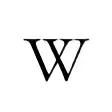
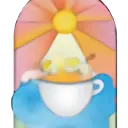
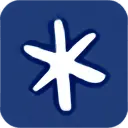
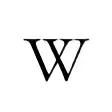
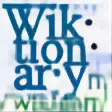
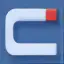
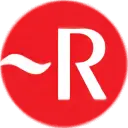
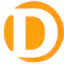
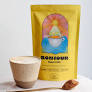
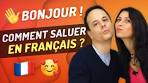
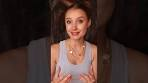
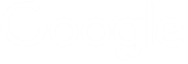
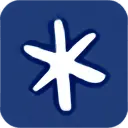
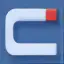

In [ ]:
from bs4 import BeautifulSoup
import requests

cookies = {
    'receive-cookie-deprecation': '1',
    'OGPC': '19041976-1:',
    'SEARCH_SAMESITE': 'CgQIx5wB',
    'SID': 'g.a000qQgHa_8lXnNQx4WgqQTVeRNA0RL23bPqTNEbY7cgcytxuB_PACZsRcS5sssOwj2e9b69rQACgYKAawSARMSFQHGX2MiVQkXaG3406poeVsI3Zo2jxoVAUF8yKpYFLDslQLgZO_Nc8XK28ac0076',
    '__Secure-1PSID': 'g.a000qQgHa_8lXnNQx4WgqQTVeRNA0RL23bPqTNEbY7cgcytxuB_PFWnpbFKfyQwUEiKtv56IBgACgYKAcUSARMSFQHGX2MiCP209fMPGET3gZkssKSe-hoVAUF8yKpkyzB43Vh1LE1aF-mR7Sbq0076',
    '__Secure-3PSID': 'g.a000qQgHa_8lXnNQx4WgqQTVeRNA0RL23bPqTNEbY7cgcytxuB_PisPzsWCY-JjonE6EThfwPQACgYKAa0SARMSFQHGX2MiLxTcUDADYcgfis4Sk_4XUhoVAUF8yKqRT5SPefXR2lu29FAohrkt0076',
    'HSID': 'AVYsG7K9ludfhDVz0',
    'SSID': 'A1p4ByTex-ACucgRf',
    'APISID': 'oRscnBcwfJzT72TI/AUrzBubEDckyYREDM',
    'SAPISID': 'ZWzahnruyh1T0KRj/AXu4RDILgYlEulJGx',
    '__Secure-1PAPISID': 'ZWzahnruyh1T0KRj/AXu4RDILgYlEulJGx',
    '__Secure-3PAPISID': 'ZWzahnruyh1T0KRj/AXu4RDILgYlEulJGx',
    'AEC': 'AZ6Zc-XExvnB6cSphjYpcYtQYiEZUyBbpH2lEWs92-CclxEcBApSlKxhpnw',
    '__Secure-ENID': '23.SE=UkiYmoP0zO8T2UFinJ2oiQhCdZcj-fO_-JCCx-n8T2ukfB-lOxR6Puwu9Bmw6AHiwmIxzhmwKkDJE3ARAVbhon6S1Heyh47tyxzEB8tPhaqAHoYwap0E9fznnNFtqEhiwZaLg_iaaBNTovfZwyub3bZXt5_91nfNhubcZrZmnI-LnznQ8hfWd9SbPBwJb4x43gIBi-FF23b1v4FBqky5U80mkAZ52H5uTbdGvtu8O7U2TV1jvrHuQBsymtE3boh755s0QoLNSSMAvEAs7fgC9aBmeglGLPWF07Od9fYZ9LBPSBsmzBoJk3fNFiyMEZ_j7w6nl3fnFIYrEThwHdDamjn5ZOAAlMcRinnVXE029D40EUk-YhJeO6Xrs4Snqi6qkakV87W4q-tCM_W6UTQ_nYQzTfVn1WyeZ3PXTTPz7ZbegA',
    'NID': '519=dHSXbqLLuChH4wu8Bg7fTtTFVXufK-xZlUaa2qCyTXO907ZIe-ke-AoaO-NX8nwb3eWJFVVRrCs_4y3BgwPZddLUAwYjSbt3THlEjH9du3915zolIyxaDgt_kK1dFxpaFojElzqSITx6LFwnXZ9wE86sYLV-gubgRdGGJ3n2tv9juFIesWNHnsz9XpYcfJOBrxz4FumplVZZ69Ob-6sYlwnVWsFIGM-dYM_xBoqbzcf896f1l9RxjasbmEKdU4nAjxh4YQ3a2qVlzteG9KCcXsPEyuWzczmesJWkg2ToYclMlhF4ASnkZDAJBgInEnfy_MfS-FC2Gb-qQvXaIb6ULoq2_zirZqQDgAijG67LXa9p0rWU6AHNMCUze8O2iEmmUCx30PvO1hEjRRP_AYjY7ccpHdnL72l8H0ZahoDz4Avl7kDuOKLmDkMhH4U0IJ7xm_7dwjGGZD1E0OC0v2DZ3IH-fAYxouJVjNKFdE7Tr_cUKb7OsMus5bVG_4DcDhgSdVCN5MsZd8knRmIsTCZrRnGZ01RYBJHnNkjhcUyFqe7y2uv8_YxIH2RJBFdXQx2OlBz75aDdcaTDqiKVMNW2NPBxQqHTHtmGEPeCFOjA-YHfwQkRqS2H6cWiaijuc2YH2gH9O0O2GvYTLU4lXFUQWTGq0Hbd4kFf4yU-wHQ3tBovEPY45fdnR9z9nsFc7igTvAz3yxkan9M-icWLq7jWBuglW-gfre2-4rf_bv68jBK5GSRkslD4yuG0dEkKNFPXAYvGBHw3clhx7AB4Vqawk-mQd4761jEvED_yR5_pVV6PzHbz5goeoeMeBY_WBs-at_a9OgfICgQaEbLsXen51ryUj-IGPYcHHxfPaETuEUtssM-rVmI_crRnMA',
    '__Secure-1PSIDTS': 'sidts-CjIBQT4rX1F9mEvsXmFzGW8zCUc_2JOluhYfIREHoAzhFN2rE0Gq4xNun_mc8lAG6MtDSRAA',
    '__Secure-3PSIDTS': 'sidts-CjIBQT4rX1F9mEvsXmFzGW8zCUc_2JOluhYfIREHoAzhFN2rE0Gq4xNun_mc8lAG6MtDSRAA',
    'DV': 'U-FpV4ghun9RcC38Z5-bAliwcjpHNBmI-LVhLnx5dgAAABAYEUSZHNXSEQAAAJx4helBK_adQgAAAMKB-zMlQ7QOFgAAAA',
    'SIDCC': 'AKEyXzURpGJW1F5EHfkkX_saNUGncpdlrmJRhhM0WMEkfqpdj1tJWBI4Y1gS4Nwcd-M4urcTnSQ',
    '__Secure-1PSIDCC': 'AKEyXzUiAVsUfmtrv3R3mL-6lJ6oPFMQsOKHo7ITg2x4QQFeMX9A7-kbO9XGzNhHTnFG6f1iaMEq',
    '__Secure-3PSIDCC': 'AKEyXzVumLkW_8vjr7qUmr7cA7X6X6Y_YWIulb_qZkSlFAkko0EXKUhDYNrxHbHbk75fb-VqxLyi',
}

headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'accept-language': 'fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7,pt;q=0.6',
    # 'cookie': 'receive-cookie-deprecation=1; OGPC=19041976-1:; SEARCH_SAMESITE=CgQIx5wB; SID=g.a000qQgHa_8lXnNQx4WgqQTVeRNA0RL23bPqTNEbY7cgcytxuB_PACZsRcS5sssOwj2e9b69rQACgYKAawSARMSFQHGX2MiVQkXaG3406poeVsI3Zo2jxoVAUF8yKpYFLDslQLgZO_Nc8XK28ac0076; __Secure-1PSID=g.a000qQgHa_8lXnNQx4WgqQTVeRNA0RL23bPqTNEbY7cgcytxuB_PFWnpbFKfyQwUEiKtv56IBgACgYKAcUSARMSFQHGX2MiCP209fMPGET3gZkssKSe-hoVAUF8yKpkyzB43Vh1LE1aF-mR7Sbq0076; __Secure-3PSID=g.a000qQgHa_8lXnNQx4WgqQTVeRNA0RL23bPqTNEbY7cgcytxuB_PisPzsWCY-JjonE6EThfwPQACgYKAa0SARMSFQHGX2MiLxTcUDADYcgfis4Sk_4XUhoVAUF8yKqRT5SPefXR2lu29FAohrkt0076; HSID=AVYsG7K9ludfhDVz0; SSID=A1p4ByTex-ACucgRf; APISID=oRscnBcwfJzT72TI/AUrzBubEDckyYREDM; SAPISID=ZWzahnruyh1T0KRj/AXu4RDILgYlEulJGx; __Secure-1PAPISID=ZWzahnruyh1T0KRj/AXu4RDILgYlEulJGx; __Secure-3PAPISID=ZWzahnruyh1T0KRj/AXu4RDILgYlEulJGx; AEC=AZ6Zc-XExvnB6cSphjYpcYtQYiEZUyBbpH2lEWs92-CclxEcBApSlKxhpnw; __Secure-ENID=23.SE=UkiYmoP0zO8T2UFinJ2oiQhCdZcj-fO_-JCCx-n8T2ukfB-lOxR6Puwu9Bmw6AHiwmIxzhmwKkDJE3ARAVbhon6S1Heyh47tyxzEB8tPhaqAHoYwap0E9fznnNFtqEhiwZaLg_iaaBNTovfZwyub3bZXt5_91nfNhubcZrZmnI-LnznQ8hfWd9SbPBwJb4x43gIBi-FF23b1v4FBqky5U80mkAZ52H5uTbdGvtu8O7U2TV1jvrHuQBsymtE3boh755s0QoLNSSMAvEAs7fgC9aBmeglGLPWF07Od9fYZ9LBPSBsmzBoJk3fNFiyMEZ_j7w6nl3fnFIYrEThwHdDamjn5ZOAAlMcRinnVXE029D40EUk-YhJeO6Xrs4Snqi6qkakV87W4q-tCM_W6UTQ_nYQzTfVn1WyeZ3PXTTPz7ZbegA; NID=519=dHSXbqLLuChH4wu8Bg7fTtTFVXufK-xZlUaa2qCyTXO907ZIe-ke-AoaO-NX8nwb3eWJFVVRrCs_4y3BgwPZddLUAwYjSbt3THlEjH9du3915zolIyxaDgt_kK1dFxpaFojElzqSITx6LFwnXZ9wE86sYLV-gubgRdGGJ3n2tv9juFIesWNHnsz9XpYcfJOBrxz4FumplVZZ69Ob-6sYlwnVWsFIGM-dYM_xBoqbzcf896f1l9RxjasbmEKdU4nAjxh4YQ3a2qVlzteG9KCcXsPEyuWzczmesJWkg2ToYclMlhF4ASnkZDAJBgInEnfy_MfS-FC2Gb-qQvXaIb6ULoq2_zirZqQDgAijG67LXa9p0rWU6AHNMCUze8O2iEmmUCx30PvO1hEjRRP_AYjY7ccpHdnL72l8H0ZahoDz4Avl7kDuOKLmDkMhH4U0IJ7xm_7dwjGGZD1E0OC0v2DZ3IH-fAYxouJVjNKFdE7Tr_cUKb7OsMus5bVG_4DcDhgSdVCN5MsZd8knRmIsTCZrRnGZ01RYBJHnNkjhcUyFqe7y2uv8_YxIH2RJBFdXQx2OlBz75aDdcaTDqiKVMNW2NPBxQqHTHtmGEPeCFOjA-YHfwQkRqS2H6cWiaijuc2YH2gH9O0O2GvYTLU4lXFUQWTGq0Hbd4kFf4yU-wHQ3tBovEPY45fdnR9z9nsFc7igTvAz3yxkan9M-icWLq7jWBuglW-gfre2-4rf_bv68jBK5GSRkslD4yuG0dEkKNFPXAYvGBHw3clhx7AB4Vqawk-mQd4761jEvED_yR5_pVV6PzHbz5goeoeMeBY_WBs-at_a9OgfICgQaEbLsXen51ryUj-IGPYcHHxfPaETuEUtssM-rVmI_crRnMA; __Secure-1PSIDTS=sidts-CjIBQT4rX1F9mEvsXmFzGW8zCUc_2JOluhYfIREHoAzhFN2rE0Gq4xNun_mc8lAG6MtDSRAA; __Secure-3PSIDTS=sidts-CjIBQT4rX1F9mEvsXmFzGW8zCUc_2JOluhYfIREHoAzhFN2rE0Gq4xNun_mc8lAG6MtDSRAA; DV=U-FpV4ghun9RcC38Z5-bAliwcjpHNBmI-LVhLnx5dgAAABAYEUSZHNXSEQAAAJx4helBK_adQgAAAMKB-zMlQ7QOFgAAAA; SIDCC=AKEyXzURpGJW1F5EHfkkX_saNUGncpdlrmJRhhM0WMEkfqpdj1tJWBI4Y1gS4Nwcd-M4urcTnSQ; __Secure-1PSIDCC=AKEyXzUiAVsUfmtrv3R3mL-6lJ6oPFMQsOKHo7ITg2x4QQFeMX9A7-kbO9XGzNhHTnFG6f1iaMEq; __Secure-3PSIDCC=AKEyXzVumLkW_8vjr7qUmr7cA7X6X6Y_YWIulb_qZkSlFAkko0EXKUhDYNrxHbHbk75fb-VqxLyi',
    'priority': 'u=0, i',
    'sec-ch-prefers-color-scheme': 'dark',
    'sec-ch-ua': '"Google Chrome";v="131", "Chromium";v="131", "Not_A Brand";v="24"',
    'sec-ch-ua-arch': '"x86"',
    'sec-ch-ua-bitness': '"64"',
    'sec-ch-ua-form-factors': '"Desktop"',
    'sec-ch-ua-full-version': '"131.0.6778.69"',
    'sec-ch-ua-full-version-list': '"Google Chrome";v="131.0.6778.69", "Chromium";v="131.0.6778.69", "Not_A Brand";v="24.0.0.0"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-model': '""',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-ua-platform-version': '"10.0.0"',
    'sec-ch-ua-wow64': '?0',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'none',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36',
    'x-browser-channel': 'stable',
    'x-browser-copyright': 'Copyright 2024 Google LLC. All rights reserved.',
    'x-browser-validation': 'QFEz3B6Z4AT6PlLzuts1mBxQGCM=',
    'x-browser-year': '2024',
    'x-client-data': 'CIy2yQEIprbJAQipncoBCNKgygEIyo3LAQiWocsBCIWgzQEIucjNAQiyns4BCNHHzgEIq8nOAQiIzM4BCNHNzgEIxs/OAQj0z84BCK7QzgEIydHOARjq080BGJ2xzgEYgMrOARiU0M4BGOrQzgE=',
}

params = {
    'q': 'bonjour',
    'rlz': '1C1ONGR_frFR1060FR1060',
    'oq': 'bonjour',
    'gs_lcrp': 'EgZjaHJvbWUyBggAEEUYOTIHCAEQABiPAjIHCAIQABiPAtIBCTg1NTFqMGoxNagCCLACAQ',
    'sourceid': 'chrome',
    'ie': 'UTF-8',
}

response = requests.get('https://www.google.com/search', params=params, cookies=cookies, headers=headers)


In [32]:

# Vérifier si la requête a réussi (code 200)
if response.status_code == 200:
        # Analyser le contenu de la page avec BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    # print(soup)  # Afficher le contenu HTML de la page
    # Accéder à une balise spécifique
    # Exemple: Trouver la première balise <h1> dans la page
    h1_tag = soup.find('a')
    print(h1_tag.text)  # Affiche le texte de la balise <h1>

    # Exemple: Trouver toutes les balises <a> (liens)
    a_tags = soup.find_all('a')
    for tag in a_tags:
        print(tag.get('href'))  # Affiche l'URL de chaque lien

else:
    print(f"Erreur lors de la requête : {response.status_code}")

ici
/search?q=bonjour&sca_esv=35f5bc0541822856&rlz=1C1ONGR_frFR1060FR1060&sxsrf=ADLYWIKKybOdB0aKY_hTRlrisH7VR1nPdg:1732020819010&gbv=1&sei=U4o8Z4kMidXszw_sn_HZCQ
None
https://support.google.com/websearch/answer/181196?hl=fr
None
https://www.google.com/webhp?hl=fr&sa=X&ved=0ahUKEwjJgaStuOiJAxWJKvsDHexPPJsQPAgI
https://www.google.fr/intl/fr/about/products?tab=wh
https://accounts.google.com/SignOutOptions?hl=fr&continue=https://www.google.com/search%3Fq%3Dbonjour%26rlz%3D1C1ONGR_frFR1060FR1060%26oq%3Dbonjour%26gs_lcrp%3DEgZjaHJvbWUyBggAEEUYOTIHCAEQABiPAjIHCAIQABiPAtIBCTg1NTFqMGoxNagCCLACAQ%26sourceid%3Dchrome%26ie%3DUTF-8&ec=GBRAAQ
None
/search?sca_esv=35f5bc0541822856&rlz=1C1ONGR_frFR1060FR1060&sxsrf=ADLYWIKKybOdB0aKY_hTRlrisH7VR1nPdg:1732020819010&q=bonjour&udm=2&fbs=AEQNm0CbCVgAZ5mWEJDg6aoPVcBgTlosgQSuzBMlnAdio07UCId2t1azIRgowYJD0nDbqEJcpCM6ACxSMx6IXRIWzbC71rV7XxTmxPeZ_gWJhsTowpviMvEq5jq-GAdSFkupV8ljFrJpVOnpHdLeIFN6bmCwqbkKP3_TlraGlYqU9DhmK4Kt3rSUL30kO9-NHMBKOVVNMORqm1lrBIS49RWzs8Gh0Br

# Exercice Final  

Exercice Final
Utilisez tout ce que vous avez appris pour récupérer des articles de News avec une catégorie. Il est souvent intéressant de partir des flux RSS pour commencer :

Les données doivent comprendre :
- Le texte important propre
- L'url
- Le domaine
- la catégorie
- Le titre de l'article
- Le titre de la page
- (Facultatif) : les images

Tips : 

- Taper le nom de votre média favoris + RSS (par exemple : https://www.lemonde.fr/rss/)
- Aller dans le DOM de la page 
- Trouver les catégories et les liens vers les articles

In [64]:
import requests
from bs4 import BeautifulSoup
def create_liste_xml(url):
    # Envoie une requête GET pour récupérer la page HTML
    response = requests.get(url)
    liste_xml=[]
    # Vérifie si la requête a réussi
    if response.status_code == 200:
        # Analyse le contenu HTML avec BeautifulSoup
        soup = BeautifulSoup(response.text, "html.parser")
        
        # Trouve tous les <p> avec les classes spécifiées
        paragraphs = soup.find_all("p", class_=["article__paragraph", "article__paragraph--lf"])
        
        # Parcours chaque paragraphe pour récupérer les liens à l'intérieur
        for paragraph in paragraphs:
            # Trouve toutes les balises <a> dans ce paragraphe
            links = paragraph.find_all("a")
            
            for link in links:
                href = link.get("href")
                if href:  # Si l'attribut href existe
                    liste_xml+=[href]
                    
    else:
        print(f"Erreur lors de la récupération de la page. Statut : {response.status_code}")


    return liste_xml

In [96]:
import re
def getnames(url):
        print(url)
        # Motif pour capturer le mot-clé entre `https://www.lemonde.fr/` et `/rss_full.xml`
        pattern1 = r"https://www\.lemonde\.fr/([^/]+)/rss.*"
        pattern2 = r"https://www\.lemonde\.fr/rss/([^.]+).xml"

        # Recherche avec re.search
        match = re.search(pattern1, url)
        if match:
            keyword = match.group(1)  # Capture le groupe 1
            return keyword
        # Recherche avec re.search
        match = re.search(pattern2, url)
        if match:
            keyword = match.group(1)  # Capture le groupe 1
            
            return keyword
        return "No match"

        

In [100]:
import requests
from bs4 import BeautifulSoup
def liste_articles(url_xml):
    # Fonction pour extraire le contenu de l'article
    def get_article_content(url):
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            
            # Exemple : extraction du texte principal de l'article (ajustez selon la structure du site)
            # Vous devrez peut-être modifier ces sélecteurs en fonction de la structure HTML du site cible
            article_content = soup.find('article', class_='article__content old__article-content-single')  # Exemple de balise contenant le contenu de l'article
            if article_content:
                return article_content.get_text(strip=True)  # Récupère uniquement le texte brut
            else:
                return "Contenu introuvable"
        else:
            return "Erreur lors de la récupération de l'article"

    # Envoie une requête GET pour récupérer le fichier XML (flux RSS)
    response = requests.get(url_xml)

    # Vérifie si la requête a réussi
    if response.status_code == 200:
        # Analyse le XML avec BeautifulSoup
        soup = BeautifulSoup(response.text, "xml")
        
        # Récupère tous les éléments <item> du flux RSS
        items = soup.find_all("item")
        
        # Crée une liste pour stocker les dictionnaires de chaque article
        articles = []
        
        # Parcours chaque élément <item> pour extraire les informations
        for item in items:
            article = {
                "title": item.find("title").text if item.find("title") else "Pas de titre",
                "pub_date": item.find("pubDate").text if item.find("pubDate") else "Pas de date de publication",
                "description": item.find("description").text if item.find("description") else "Pas de description",
                "guid": item.find("guid").text if item.find("guid") else "Pas de guid",
                "link": item.find("link").text if item.find("link") else "Pas de lien",
                "image_url": item.find("media:content")["url"] if item.find("media:content") else "Pas d'image"
                
            }
            
            # Récupérer le contenu de l'article via son URL
            article_content = get_article_content(article["link"])
            article["content"] = article_content  # Ajoute le contenu au dictionnaire
            # Ajoute le dictionnaire de l'article à la liste
            articles.append(article)
            article["catégorie"]= getnames(url_xml)
            return articles
    else:
        print(f"Erreur lors de la récupération du fichier XML. Statut : {response.status_code}")
        return "ERROR : {response.status_code}"


   


In [101]:
# L'URL à scraper
url = "https://www.lemonde.fr/actualite-medias/article/2019/08/12/les-flux-rss-du-monde-fr_5498778_3236.html"

liste_xml=create_liste_xml(url)

print(liste_xml)
liste_articles=liste_articles(liste_xml[1])
print(liste_articles)


['https://www.lemonde.fr/rss/une.xml', 'https://www.lemonde.fr/rss/en_continu.xml', 'https://www.lemonde.fr/videos/rss_full.xml', 'https://www.lemonde.fr/photo/rss_full.xml', 'https://www.lemonde.fr/rss/plus-lus.xml', 'https://www.lemonde.fr/rss/plus-partages.xml', 'https://www.lemonde.fr/international/rss_full.xml', 'https://www.lemonde.fr/europe/rss_full.xml', 'https://www.lemonde.fr/ameriques/rss_full.xml', 'https://www.lemonde.fr/afrique/rss_full.xml', 'https://www.lemonde.fr/asie-pacifique/rss_full.xml', 'https://www.lemonde.fr/proche-orient/rss_full.xml', 'https://www.lemonde.fr/royaume-uni/rss_full.xml', 'https://www.lemonde.fr/etats-unis/rss_full.xml', 'https://www.lemonde.fr/politique/rss_full.xml', 'https://www.lemonde.fr/societe/rss_full.xml', 'https://www.lemonde.fr/les-decodeurs/rss_full.xml', 'https://www.lemonde.fr/justice/rss_full.xml', 'https://www.lemonde.fr/police/rss_full.xml', 'https://www.lemonde.fr/campus/rss_full.xml', 'https://www.lemonde.fr/education/rss_full.